In [3]:
import torch
from easy_transformer import EasyTransformer

#device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cpu'
print(f"Using {device} device")
torch.set_grad_enabled(False)

model = EasyTransformer.from_pretrained('gpt2', device=device)

# Convenience function for decoding token
decode = model.tokenizer.decode

# Convenience function for encoding token
def encode(t):
    global model
    result = model.tokenizer.encode(t)
    if len(result) != 1:
        raise Exception(f"Not a single token: {t}")
    return result[0]

unembed = model.unembed.W_U.data
embed = model.embed.W_E.data
d_M = model.cfg.d_model
d_V = model.cfg.d_vocab

unembed_norm = torch.nn.functional.normalize(unembed, dim=0)

Using cpu device
Loading model: gpt2


Using pad_token, but it is not set yet.


Moving model to device:  cpu
Finished loading pretrained model gpt2 into EasyTransformer!


In [15]:
from sklearn.decomposition import TruncatedSVD

transformed = TruncatedSVD(d_M).fit_transform(unembed.T)
print(transformed.shape)

(50257, 768)


<IPython.core.display.Javascript object>


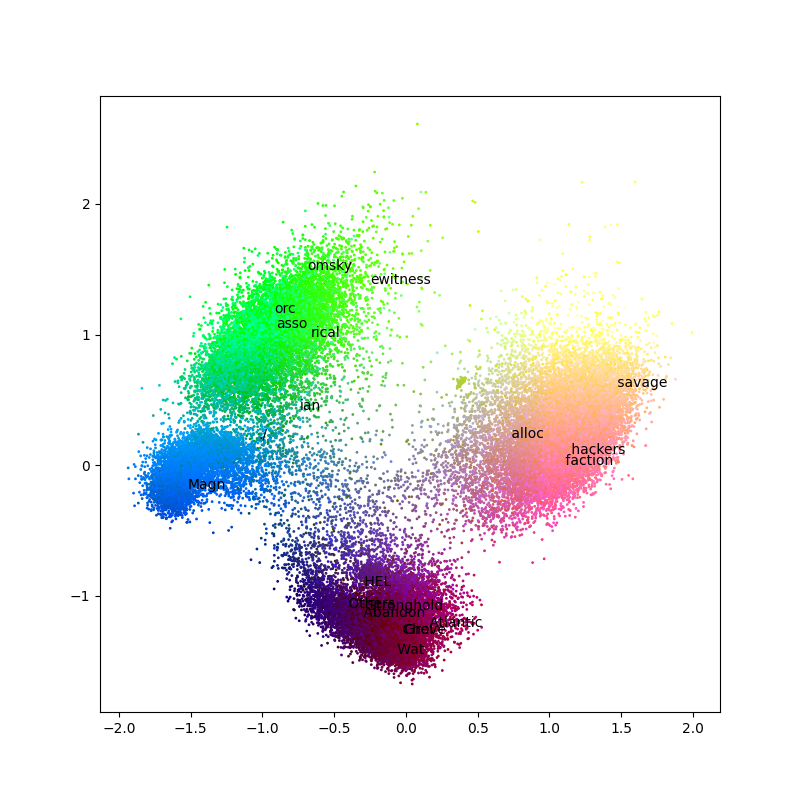

In [64]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(transformed[:,0], transformed[:,1], s=1, c=np.clip(0.5 + 0.5 * transformed[:,:3], 0, 1))
random.seed(12345)
for i in random.sample(range(d_V),k=20):
    ax.text(transformed[i,0], transformed[i,1], decode(i), parse_math=False)

<IPython.core.display.Javascript object>


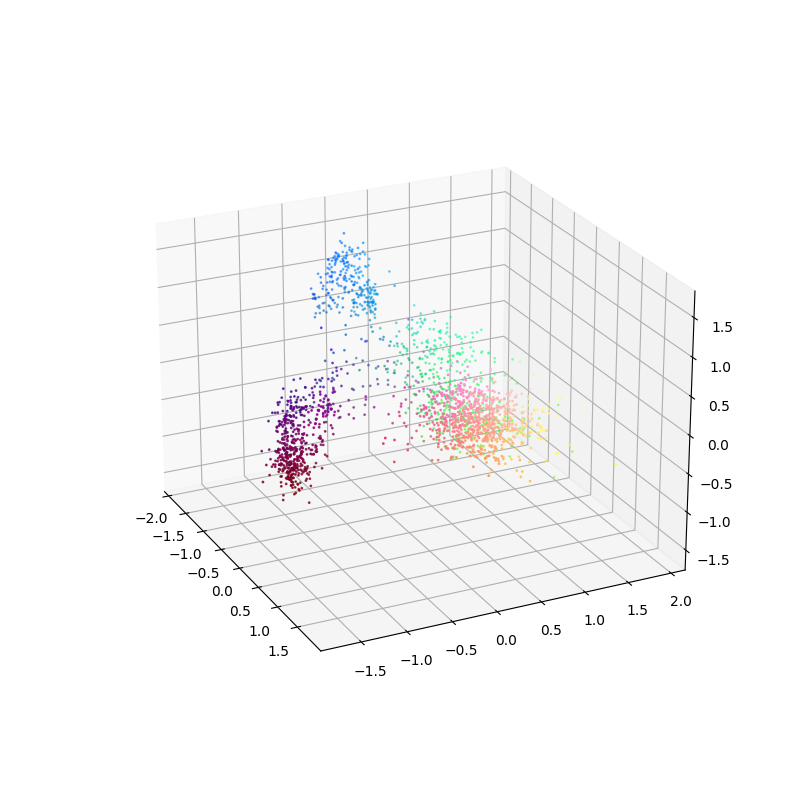

In [67]:
%matplotlib notebook
import random
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
indices = np.array(random.sample(range(d_V),k=2000))
ax.scatter(transformed[indices,0], transformed[indices,1], transformed[indices,2], s=1, c=np.clip(0.5 + 0.5 * transformed[indices,:3], 0, 1))

<IPython.core.display.Javascript object>


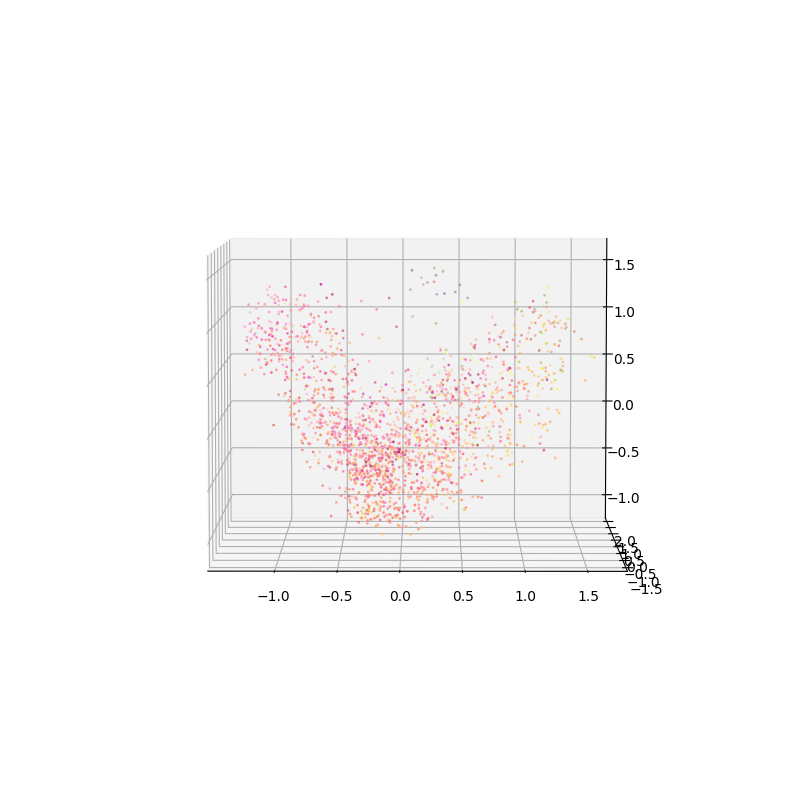

In [93]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

keep_indices, = np.nonzero(transformed[:,0] > 0.4)

data2 = unembed[:,keep_indices]
transformed2 = PCA(d_M-2).fit_transform(data2.T)

indices = np.array(random.sample(range(keep_indices.shape[0]),k=2000))
indices2 = keep_indices[indices]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(transformed2[indices,0], transformed2[indices,1], transformed2[indices,2], s=1, c=np.clip(0.5 + 0.5 * transformed[indices2,:3], 0, 1))

<IPython.core.display.Javascript object>


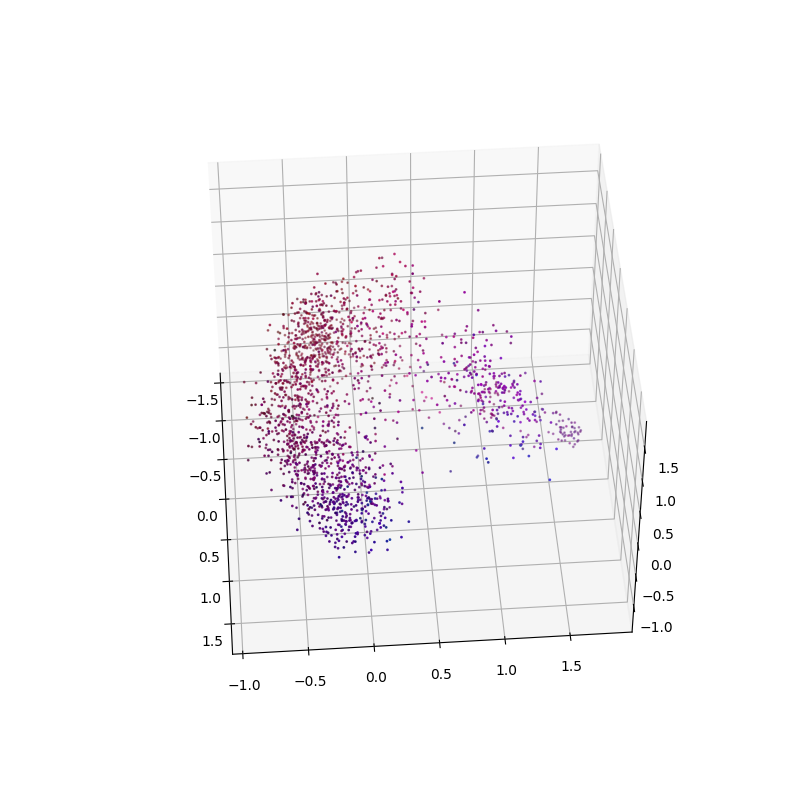

In [92]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

keep_indices, = np.nonzero(transformed[:,1] < -0.5)

data2 = unembed[:,keep_indices]
transformed2 = PCA(d_M-2).fit_transform(data2.T)

indices = np.array(random.sample(range(keep_indices.shape[0]),k=2000))
indices2 = keep_indices[indices]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(transformed2[indices,0], transformed2[indices,1], transformed2[indices,2], s=1, c=np.clip(0.5 + 0.5 * transformed[indices2,:3], 0, 1))